# Classification Algorithms

# 1.Decision Tree Algorithm

# 2.k-nearest neighbors (KNN) Algorithm

# 3.Logistic Regression Algorithm

# 4.K-Means clustering Classifier

In [ ]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Importing the Dataset

dataset = pd.read_csv("bill_authentication.csv")

In [4]:
#Data Analysis

dataset.shape

(1372, 5)

In [5]:
dataset.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
dataset['Class'].value_counts()

0    762
1    610
Name: Class, dtype: int64

In [7]:
dataset.info

<bound method DataFrame.info of       Variance  Skewness  Curtosis  Entropy  Class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]>

In [8]:
#Preparing the Data

X = dataset.drop('Class', axis=1)
y = dataset['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
X.head(0)

,Variance,Skewness,Curtosis,Entropy


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# 1.DecisionTreeClassifier

In [11]:
#Training and Making Predictions---------------------------DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("\n-------------------------Decision tree classfier-------------------------\n")

print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))

print("Classification Report :\n",classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy : ",accuracy_score(y_test, y_pred))


-------------------------Decision tree classfier-------------------------

Confusion matrix :
 [[150   1]
 [  2 122]]
Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       151
           1       0.99      0.98      0.99       124

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy :  0.9890909090909091


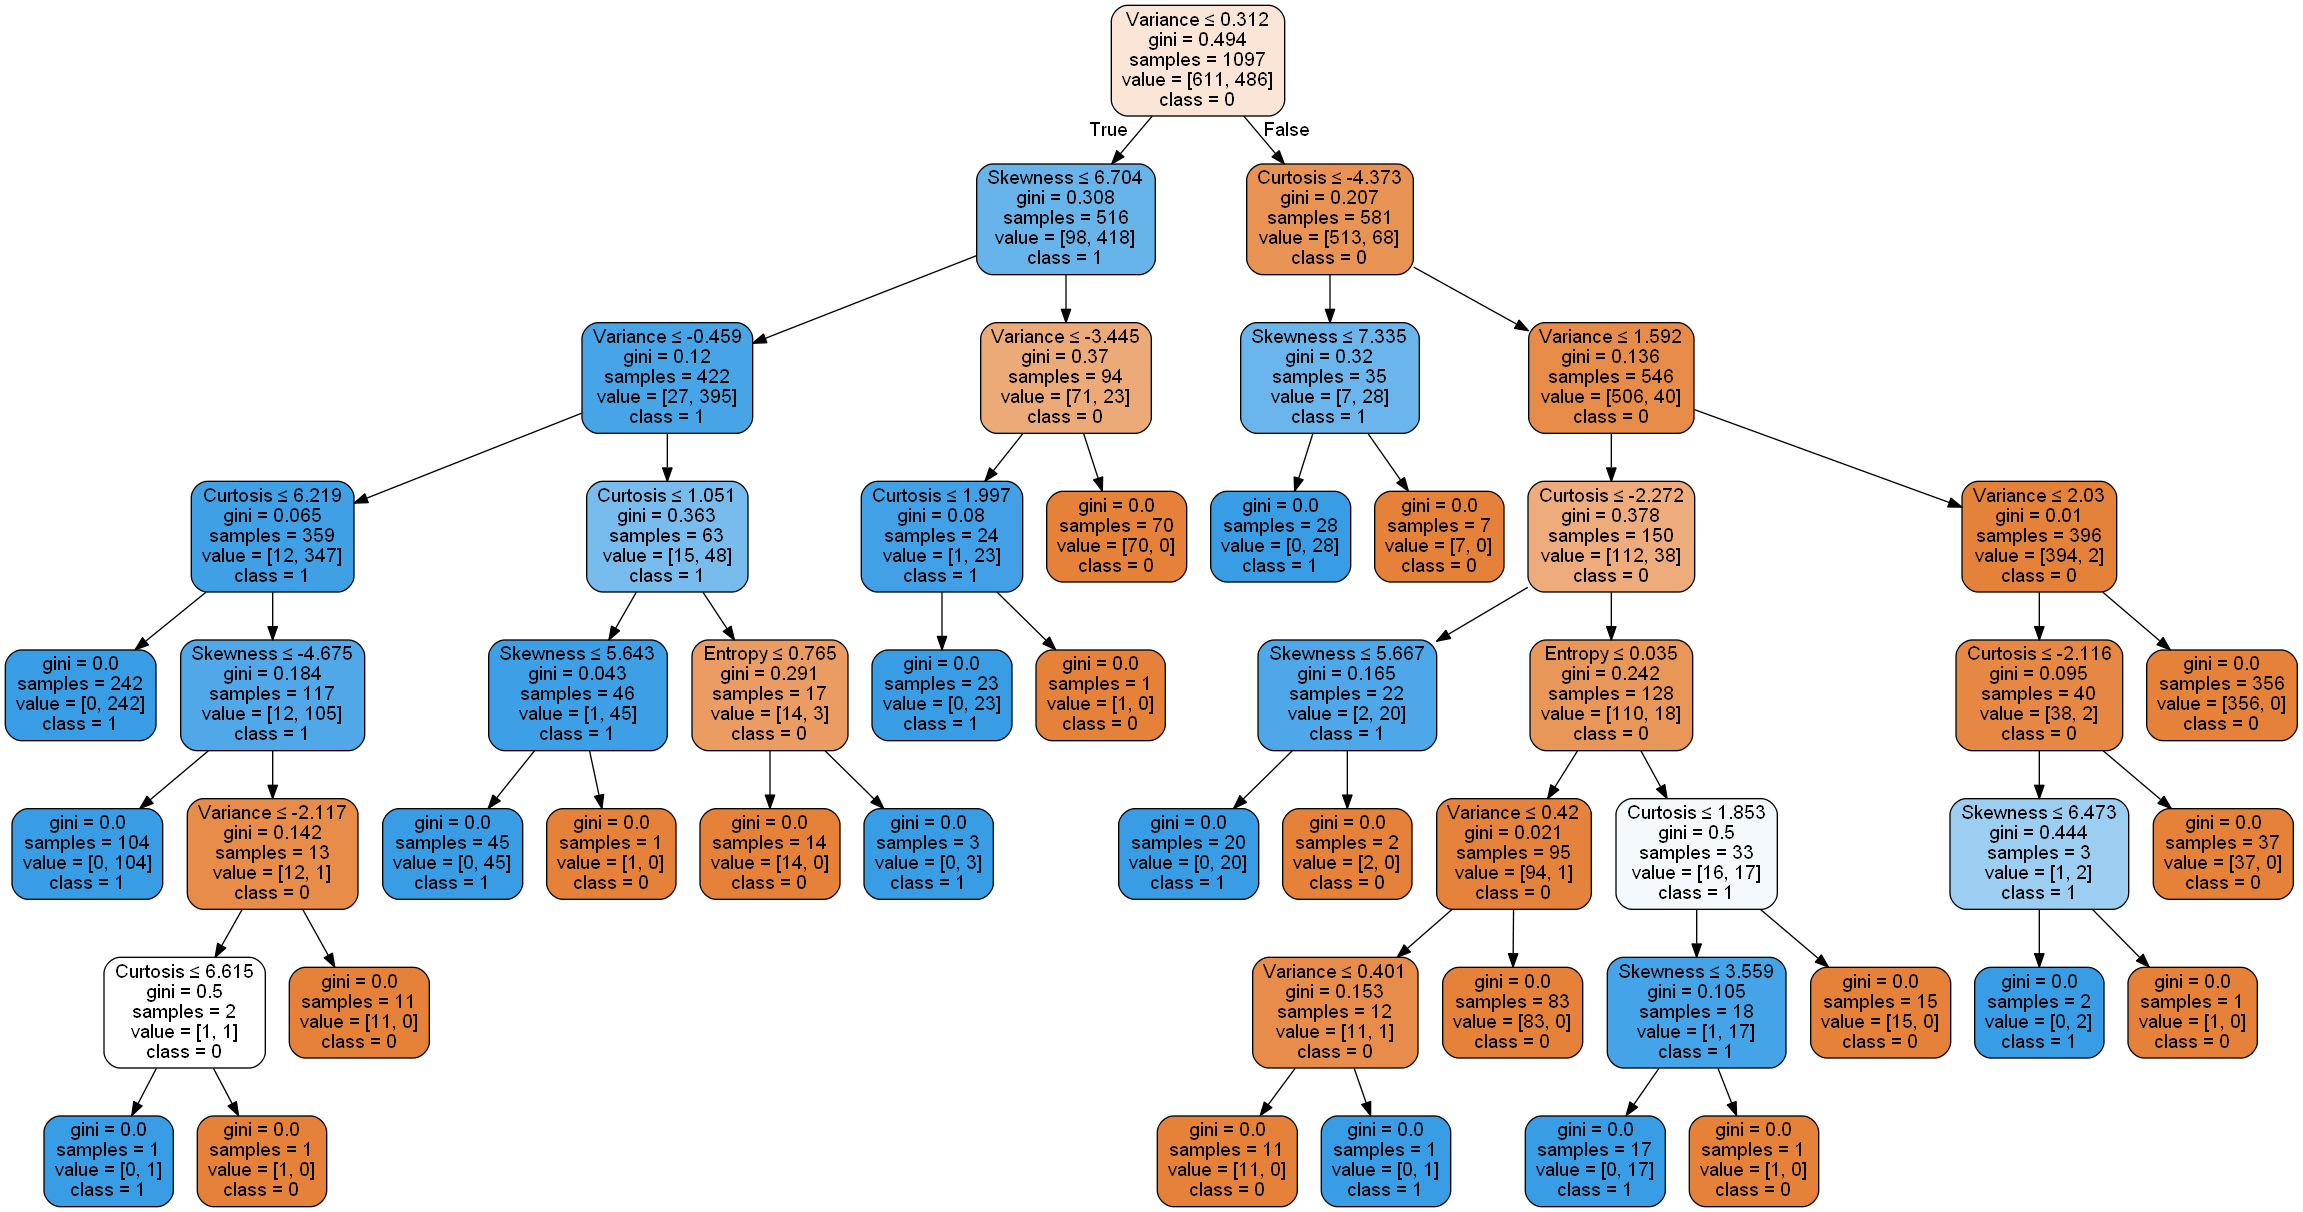

In [14]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

feature_cols=['Variance','Skewness','Curtosis','Entropy']
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 2.KNeighborsClassifier

In [15]:
#Training and Making Predictions---------------------------KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

# KNN model requires you to specify n_neighbors,
# the number of points the classifier will look at to determine what class a new point belongs to
KNN_model = KNeighborsClassifier(n_neighbors=5)

KNN_model.fit(X_train, y_train)

y_pred = KNN_model.predict(X_test)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print("\n-------------------------K Neighbors Classifier-------------------------\n")

print("Confusion matrix :\n",confusion_matrix(y_test, y_pred))

print("Classification Report :\n",classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy : ",accuracy_score(y_test, y_pred))


-------------------------K Neighbors Classifier-------------------------

Confusion matrix :
 [[151   0]
 [  0 124]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       124

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275

Accuracy :  1.0


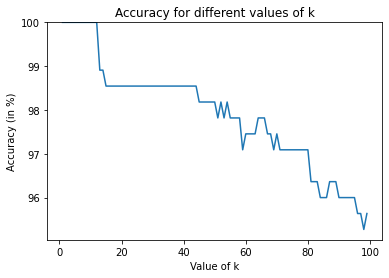

In [17]:
import matplotlib.pyplot as plot

x_coords = []
y_coords = []

#checking accuracy for various values of k
for k in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    x_coords.append(k)
    y_coords.append(knn.score(X_test, y_test)*100)
    
    
#plotting the graph
plot.figure()
plot.plot(x_coords, y_coords)
plot.xlabel("Value of k")
plot.ylabel("Accuracy (in %)")
plot.ylim(top = 100)
plot.title("Accuracy for different values of k")
plot.show()

# 3.Logistic Regression Model

In [18]:
#Training and Making Predictions---------------------------Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

logit = LogisticRegression()

logit.fit(X_train,y_train)

y_pred = logit.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("\n-------------------------Logistic Regression Model------------------------\n")

print("Confusion matrix :\n",confusion_matrix)

print("Classification Report :\n",classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy : ",accuracy_score(y_test, y_pred))


-------------------------Logistic Regression Model------------------------

Confusion matrix :
 [[149   2]
 [  0 124]]
Classification Report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       151
           1       0.98      1.00      0.99       124

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275

Accuracy :  0.9927272727272727


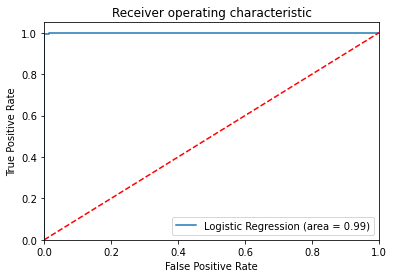

In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logit.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# 4.K-Means clustering Classifier

In [50]:
#Training and Making Predictions---------------------------K-Means clustering Classifier

from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

kmeans = KMeans(n_clusters=2, random_state=0)

kmeans.fit(X_train,y_train)

y_pred=kmeans.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("\n-------------------------K-Means clustering Classifier------------------------\n")

print("Confusion matrix :\n",confusion_matrix)

print("Classification Report :\n",classification_report(y_test, y_pred))

# Model Accuracy, how often is the classifier correct?
print("Accuracy : ",accuracy_score(y_test, y_pred))


-------------------------K-Means clustering Classifier------------------------

Confusion matrix :
 [[ 36 115]
 [ 66  58]]
Classification Report :
               precision    recall  f1-score   support

           0       0.35      0.24      0.28       151
           1       0.34      0.47      0.39       124

    accuracy                           0.34       275
   macro avg       0.34      0.35      0.34       275
weighted avg       0.34      0.34      0.33       275

Accuracy :  0.3418181818181818


In [58]:
print(kmeans.cluster_centers_)


[[-0.3453974  -4.63343166  6.1421095  -0.08948979]
 [ 0.84039248  5.28146912 -0.97674208 -1.77323954]]


In [59]:
print(kmeans.labels_)


[1 0 0 ... 1 1 0]
